In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Select stock


In [3]:
ticker_symbol = "NFLX"
# ticker object 
tick = yf.Ticker(ticker_symbol)

#### Get Closing Prices 

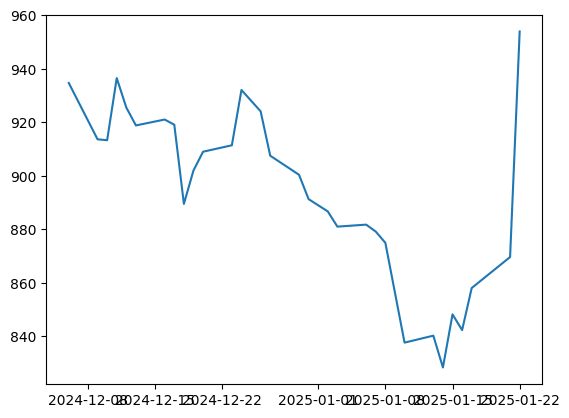

In [4]:
data = tick.history(period = "30d")['Close']
# plot data 
plt.plot(data)
 

## Find the local mininum and maximum

In [5]:
# i.e. find minimum and maximum in the last month (last 30 days)

In [6]:
df = pd.DataFrame(data)
df = df.reset_index()
maximum = int(df["Close"].max())
minimum = int(df["Close"].min())

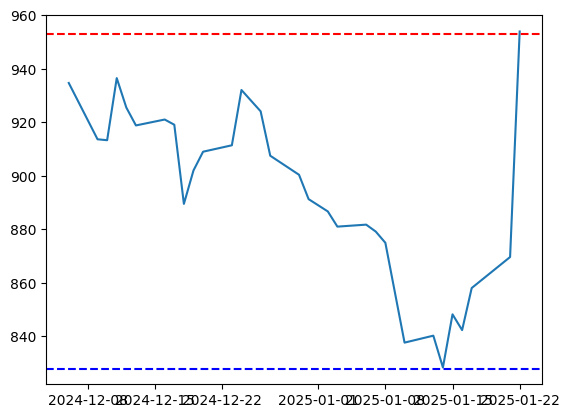

In [7]:
# line colour is red 
plt.plot(data)
plt.axhline(y = maximum, color = 'r', linestyle = 'dashed')   
plt.axhline(y = minimum, color = 'b', linestyle = 'dashed')  

In [8]:
print(maximum)
print(minimum)
def find_strike(number):
    x = 100
    n = number%x
    if n <50:
        p = int(number/x)*x
        return p + 100, p - 50
    else:
        p = int(number/x)*100 +100
        return p -100, p + 50
    

953
828


In [9]:
strike_max = find_strike(maximum)
strike_min = find_strike(minimum)

In [10]:
print(strike_max)
print(strike_min)

(900, 1050)
(900, 750)


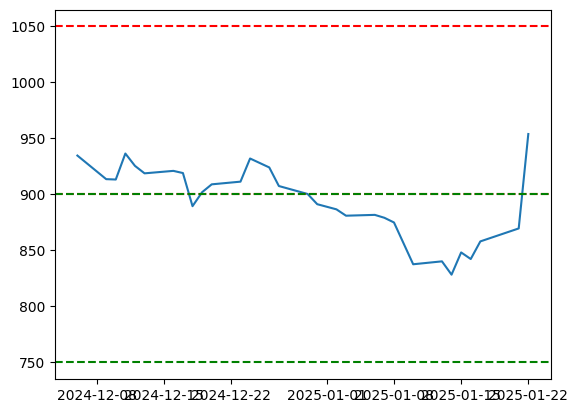

In [11]:
plt.plot(data)
plt.axhline(y = strike_max[0], color = "r", linestyle = 'dashed')
plt.axhline(y = strike_max[1], color = "r", linestyle = 'dashed')
plt.axhline(y = strike_min[0], color = "g", linestyle = 'dashed')
plt.axhline(y = strike_min[1], color = "g", linestyle = 'dashed')

## Find Option Chain (call and puts) for strike prices around these 2 values 
(confused, check for evidence)

In [12]:
opt_chain = tick.option_chain() 
calls = opt_chain.calls
puts = opt_chain.puts

In [44]:
calls.to_csv("Calls_NFLX_22Jan.csv", index=True)

In [28]:
tick2 = yf.Ticker("NFLX250124C00900000")
tick2.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-23 00:00:00-05:00,50.380001,55.889999,49.599998,55.889999,4,0.0,0.0
2024-12-24 00:00:00-05:00,60.459999,70.349998,60.459999,68.190002,5,0.0,0.0
2024-12-26 00:00:00-05:00,57.910000,60.400002,57.910000,60.400002,3,0.0,0.0
2024-12-27 00:00:00-05:00,50.000000,52.000000,47.209999,52.000000,55,0.0,0.0
2024-12-30 00:00:00-05:00,44.700001,51.189999,44.700001,49.450001,47,0.0,0.0
2024-12-31 00:00:00-05:00,48.099998,48.099998,42.299999,42.599998,26,0.0,0.0
2025-01-02 00:00:00-05:00,39.450001,43.980000,36.299999,39.750000,20,0.0,0.0
2025-01-03 00:00:00-05:00,42.000000,45.549999,35.150002,36.610001,59,0.0,0.0
2025-01-06 00:00:00-05:00,38.299999,38.299999,30.750000,33.200001,123,0.0,0.0


In [29]:
def get_option_data(stock_symbol, expiration_date, option_type, strike):
    stock = yf.Ticker(stock_symbol)
    option_chain = stock.option_chain(expiration_date)
    options = getattr(option_chain, "calls" if option_type.startswith("call") else "puts")
    option_data = options[options["strike"] == strike]
    return option_data

In [33]:
import yfinance as yf
import datetime


def get_option_data(stock_symbol, expiration_date, option_type, strike):
    stock = yf.Ticker(stock_symbol)
    option_chain = stock.option_chain(expiration_date)
    options = getattr(option_chain, "calls" if option_type.startswith("call") else "puts")
    option_data = options[options["strike"] == strike]
    return option_data


def get_option_history_data(contract_symbol, days_before_expiration=30):
    option = yf.Ticker(contract_symbol)
    option_info = option.info
    option_expiration_date = datetime.datetime.fromtimestamp(option_info["expireDate"])

    start_date = option_expiration_date - datetime.timedelta(days=days_before_expiration)
    option_history = option.history(start=start_date)
    return option_history


def main(*args):
    # Example:
    stock_symbol = "NFLX"
    expiration_date = "2025-01-23"
    expiration_date = None
    option_type = "call"
    strike = 800.0

    option_data = get_option_data(stock_symbol, expiration_date, option_type, strike)
    for i, od in option_data.iterrows():
        contract_symbol = od["contractSymbol"]
        option_history = get_option_history_data(contract_symbol)
        first_option_history = option_history.iloc[0]
        first_option_history_date = option_history.index[0]
        first_option_history_close = first_option_history["Close"]
        print("For {}, the closing price was ${:.2f} on {}.".format(
            contract_symbol,
            first_option_history_close,
            first_option_history_date
        ))


if __name__ == "__main__":
    main()

For NFLX250124C00800000, the closing price was $136.95 on 2024-12-26 00:00:00-05:00.


In [120]:
calls[calls["strike"]== (strike_min[0])]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
72,NFLX250124C00900000,2025-01-21 20:59:56+00:00,900.0,24.35,24.0,24.85,3.35,15.764708,5821.0,2590,1.019658,False,REGULAR,USD


In [ ]:
# all expiration dates
tick.options

('2025-01-24',
 '2025-01-31',
 '2025-02-07',
 '2025-02-14',
 '2025-02-21',
 '2025-02-28',
 '2025-03-21',
 '2025-04-17',
 '2025-05-16',
 '2025-06-20',
 '2025-08-15',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18',
 '2027-01-15')

Date
2025-01-14 00:00:00-05:00    828.400024
2025-01-15 00:00:00-05:00    848.260010
2025-01-16 00:00:00-05:00    842.369995
2025-01-17 00:00:00-05:00    858.099976
2025-01-21 00:00:00-05:00    869.679993
Name: Close, dtype: float64

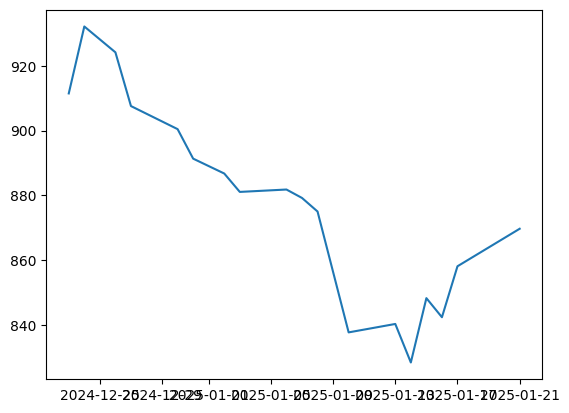

In [32]:
plt.plot(data)

In [37]:
calls = calls[calls["strike"] == 870]


In [38]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
66,NFLX250124C00870000,2025-01-21 20:55:02+00:00,870.0,36.95,37.55,37.85,4.799999,14.837709,3104.0,437,1.042668,False,REGULAR,USD


In [18]:
tick.option_chain().calls